## Annual and Monthly Means of the Maximum Temperatures of PFL + CTD Instruments in the Polynya Region

This notebook reads a csv file that stores the maximum temperature time series and then plots the annual and monthly means.   

In [1]:
# import libraries
from datetime import datetime, timedelta
import numpy as np
import xarray
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import pandas as pd
from pandas import Series, DataFrame
import gsw
import cmocean
import sys
import glob
import errno
import os
import os.path
import netCDF4 as nc
import geopandas as gpd
import string
import time
import csv
from matplotlib.backends.backend_pdf import PdfPages

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\cmocean\tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
df1 = pd.read_csv('path\csvfile', header=None, error_bad_lines=False, delimiter=',')
# Insert file path you stored MaxTemp in
df1.columns = ['YearTime', 'MaxTemp'] # Setup the column headers
df1

,YearTime,MaxTemp
0,1981-10-26 21:08:59.996910592,0.399
1,1981-10-27 00:22:59.999918080,0.397
2,1981-10-29 19:28:00.003548160,0.851
3,1981-10-29 22:02:59.998969856,0.789
4,1981-10-30 18:36:00.003089408,0.706
5,1981-10-30 21:52:00.000457728,0.741
6,1981-10-31 21:13:00.000114688,0.903
7,1981-10-31 23:40:59.995078656,0.797
8,1981-11-02 06:52:59.998684160,0.433
9,1981-11-02 12:23:59.998626816,0.380


In [3]:
df2 = df1.set_index("YearTime", drop = False) # Set time as index of the dataframe
df2

,YearTime,MaxTemp
YearTime,,
1981-10-26 21:08:59.996910592,1981-10-26 21:08:59.996910592,0.399
1981-10-27 00:22:59.999918080,1981-10-27 00:22:59.999918080,0.397
1981-10-29 19:28:00.003548160,1981-10-29 19:28:00.003548160,0.851
1981-10-29 22:02:59.998969856,1981-10-29 22:02:59.998969856,0.789
1981-10-30 18:36:00.003089408,1981-10-30 18:36:00.003089408,0.706
1981-10-30 21:52:00.000457728,1981-10-30 21:52:00.000457728,0.741
1981-10-31 21:13:00.000114688,1981-10-31 21:13:00.000114688,0.903
1981-10-31 23:40:59.995078656,1981-10-31 23:40:59.995078656,0.797
1981-11-02 06:52:59.998684160,1981-11-02 06:52:59.998684160,0.433


   YearTime      MEAN
0      1977  2.572200
1      1981  0.616900
2      1984  1.305200
3      1986  0.804068
4      1991  0.790367
5      1992  0.993377
6      1994  0.863833
7      1996  0.969000
8      1998  0.948919
9      1999  0.650536
10     2000  0.739567
11     2001  0.560000
12     2002  0.755239
13     2003  1.054890
14     2004  1.146061
15     2005  0.994259
16     2006  0.612522
17     2007  0.616227
18     2008  0.818546
19     2009  0.648825
20     2010  0.755065
21     2011  0.759381
22     2012  0.898157
23     2013  0.788894
24     2014  0.849840
25     2015  0.978272
26     2016  0.763349
27     2017  0.914638


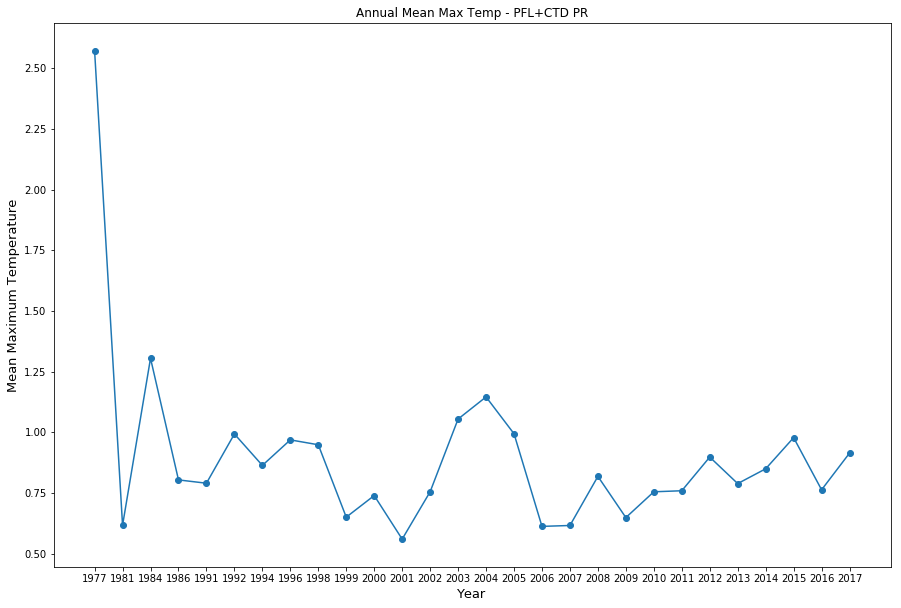

In [4]:
# Plot Annual Mean Maximum Temperature
df3 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).mean().rename('MEAN').reset_index()
print (df3)

fig=plt.figure(figsize=(15,10))
plt.plot(df3['YearTime'], df3['MEAN'])
plt.scatter(df3['YearTime'], df3['MEAN'])
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Maximum Temperature', fontsize = 13)
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Annual Mean Max Temp - PFL+CTD PR')
plt.show()

    YearTime      mean  count
0    1977-01  2.578200     10
1    1977-02  2.560200      5
2    1981-10  0.697875      8
3    1981-11  0.562917     12
4    1984-01  1.305200      5
5    1986-04  0.840750      4
6    1986-07  0.667000      2
7    1986-08  0.818597     72
8    1986-09  0.455000      2
9    1986-12  0.776500      8
10   1991-03  0.790367      3
11   1992-03  1.274556      9
12   1992-06  0.844518     17
13   1994-04  0.863833      6
14   1996-01  1.011100      1
15   1996-04  0.965173     11
16   1998-01  1.089000      2
17   1998-05  0.928907     14
18   1999-01  0.979500      2
19   1999-03  1.019740      5
20   1999-04 -0.180267      3
21   1999-12  0.639000      1
22   2000-12  0.739567      6
23   2001-12  0.560000      1
24   2002-01  0.480000      1
25   2002-02  0.455000      1
26   2002-03  0.514667      3
27   2002-04  0.614750      4
28   2002-05  0.676800      5
29   2002-06  0.516750      4
..       ...       ...    ...
145  2015-07  1.018733     15
146  2015-

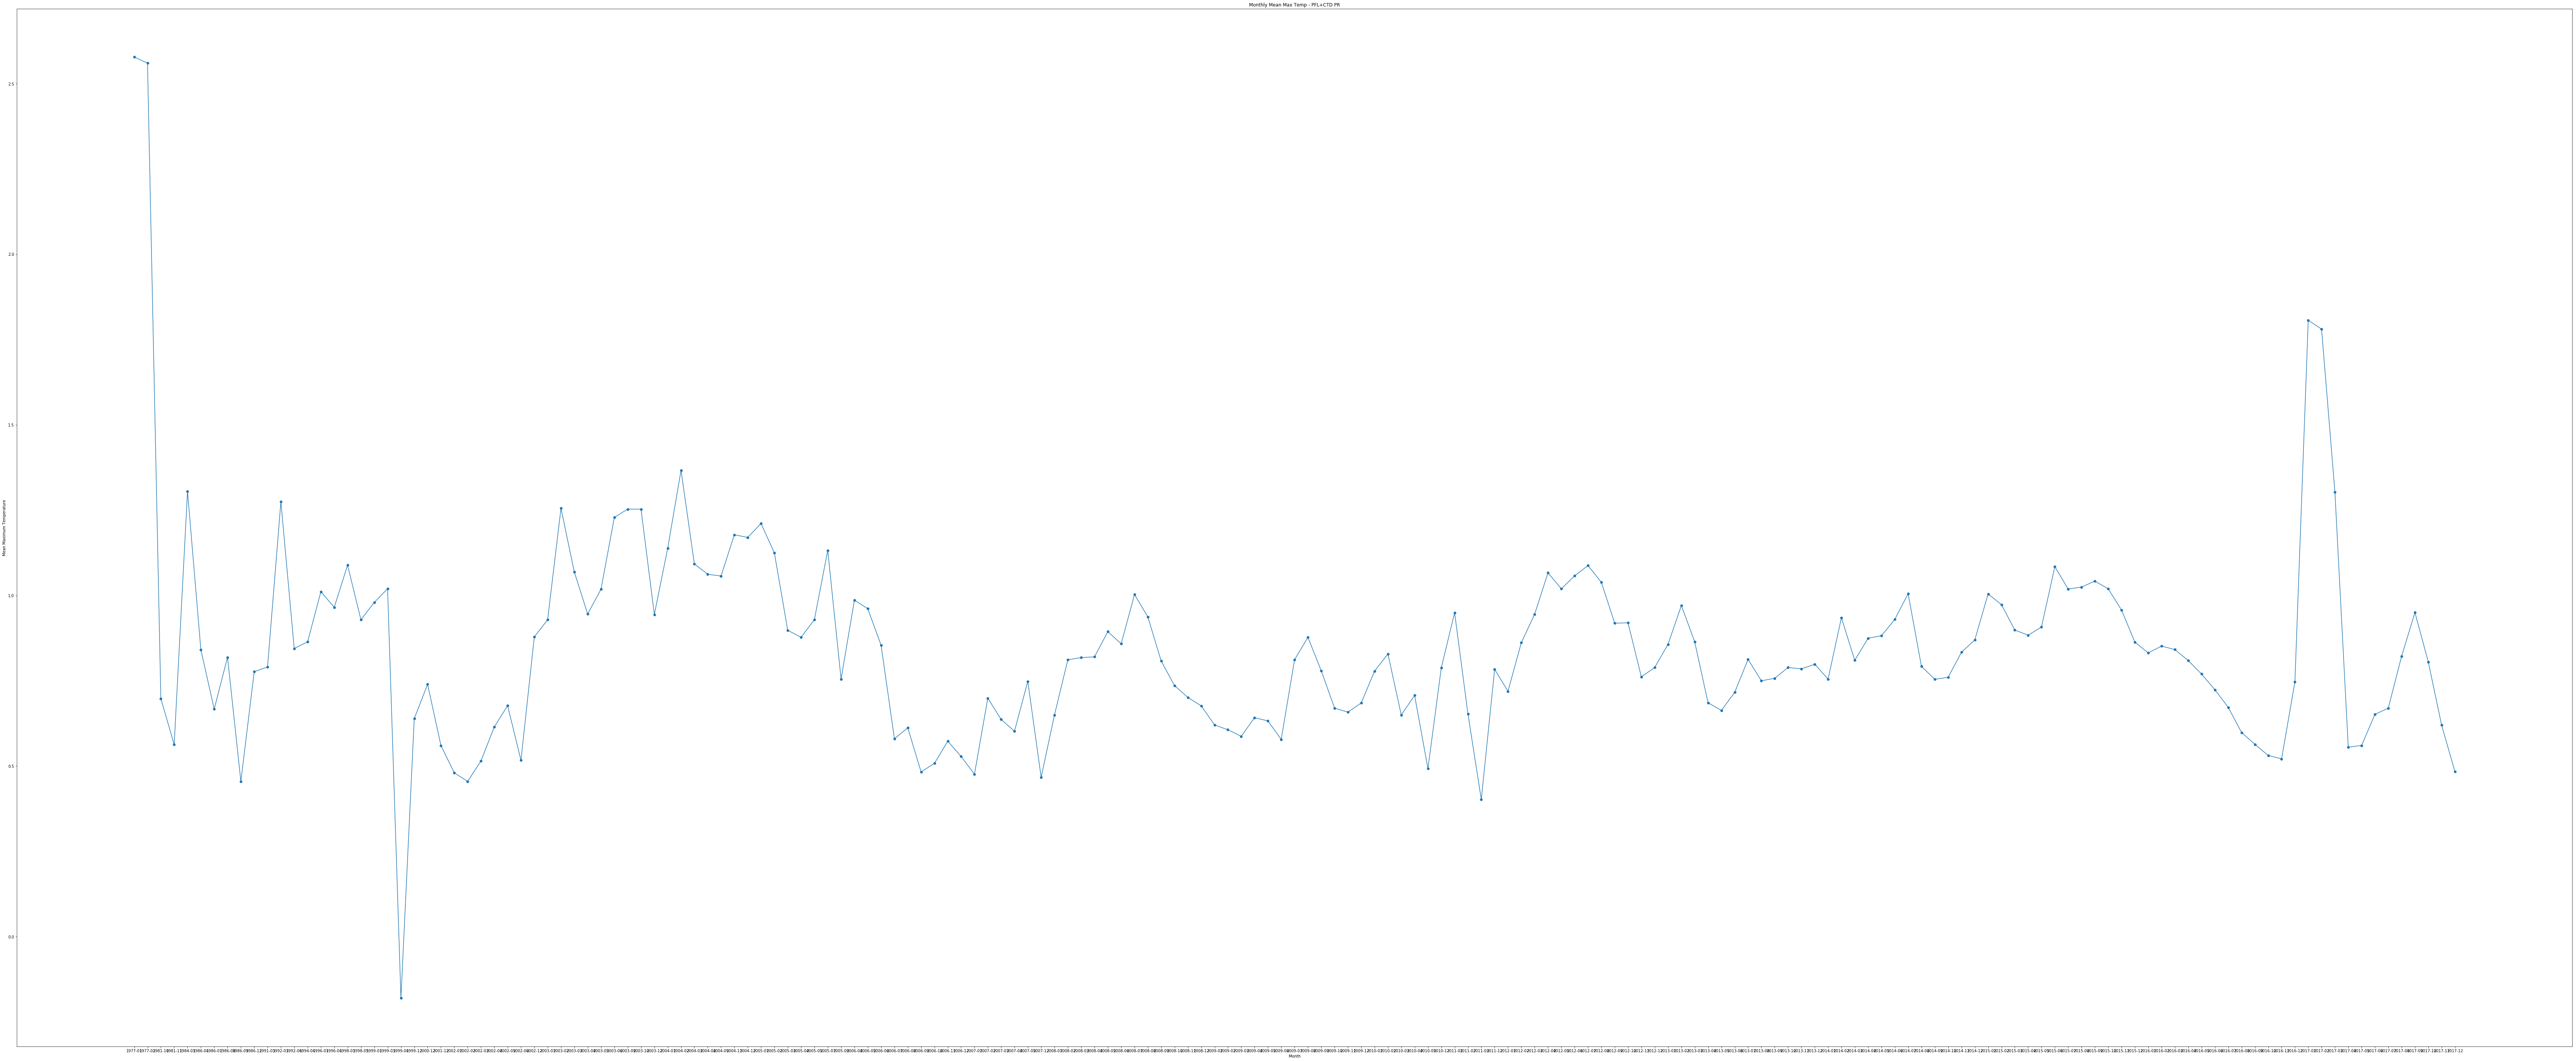

In [16]:
# Plot Monthly Mean Maximum Temperature and monthly datapoints count
df3m = df2['MaxTemp'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
print (df3m)

x = df3m['YearTime']
y = df3m['mean'] # Mean dataframe

plt.figure(figsize=(120,50))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Maximum Temperature')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Monthly Mean Max Temp - PFL+CTD PR')
plt.show()

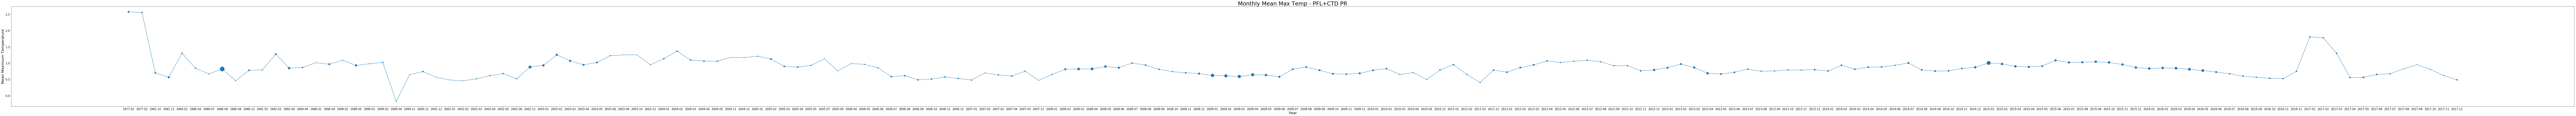

In [28]:
# Bubble Plot of the Monthly Mean Maximum Temperature with datapoints count
df6 = df3m['mean'].groupby(df3m['YearTime'].str[:4])
print (df6)

x = df3m['YearTime']
y = df3m['mean'] # Mean dataframe

plt.figure(figsize=(250,10))
plt.plot(x, y)
plt.scatter(x, y, s=df3m['count']*8) # s plots count
plt.xlabel('Year',  fontsize=20)
plt.ylabel('Mean Maximum Temperature',  fontsize=20)
plt.title('Monthly Mean Max Temp - PFL+CTD PR',  fontsize=30)
#plt.errorbar(x, y, e, linestyle='None', marker='^', elinewidth = 1, barsabove = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

   YearTime      mean       std  count
0      1977  2.572200  0.406744     15
1      1981  0.616900  0.188251     20
2      1984  1.305200  0.189471      5
3      1986  0.804068  0.307599     88
4      1991  0.790367  0.411363      3
5      1992  0.993377  0.294031     26
6      1994  0.863833  0.351542      6
7      1996  0.969000  0.266313     12
8      1998  0.948919  0.205582     16
9      1999  0.650536  0.801807     11
10     2000  0.739567  0.240384      6
11     2001  0.560000       NaN      1
12     2002  0.755239  0.291280     44
13     2003  1.054890  0.270657     73
14     2004  1.146061  0.171243     33
15     2005  0.994259  0.225744     34
16     2006  0.612522  0.202515     46
17     2007  0.616227  0.146688     22
18     2008  0.818546  0.221728    136
19     2009  0.648825  0.349993    218
20     2010  0.755065  0.389047     31
21     2011  0.759381  0.296732     21
22     2012  0.898157  0.191464     83
23     2013  0.788894  0.180382    104
24     2014  0.849840  0.

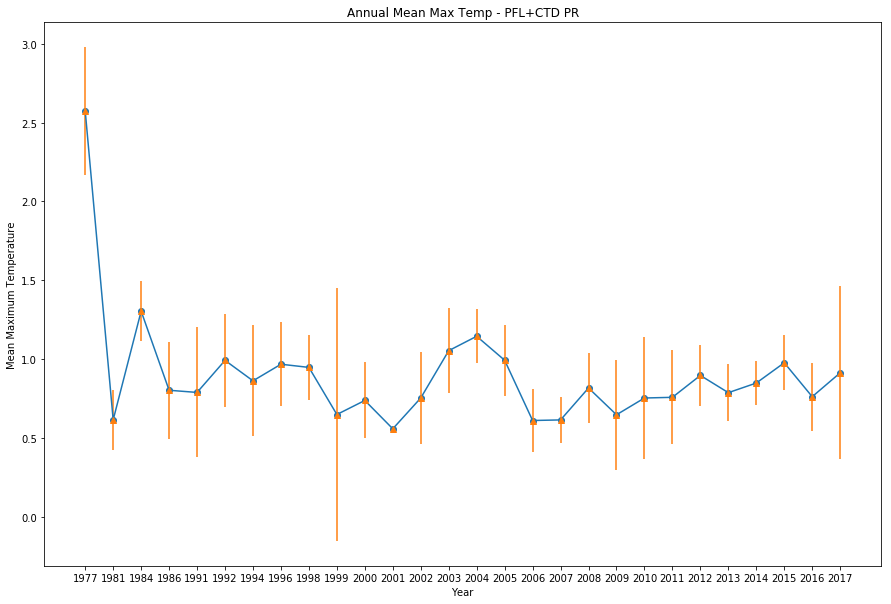

In [6]:
# Plot Annual Mean Maximum Temperature with Std. Dev. and annual datapoints count
df4 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
print (df4)

x = df4['YearTime']
y = df4['mean'] # Mean dataframe
e = df4['std'] # Standard deviation dataframe

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mean Maximum Temperature')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Max Temp - PFL+CTD PR')
plt.show()

   YearTime      mean       std  count
1      1981  0.616900  0.188251     20
2      1984  1.305200  0.189471      5
3      1986  0.804068  0.307599     88
4      1991  0.790367  0.411363      3
5      1992  0.993377  0.294031     26
6      1994  0.863833  0.351542      6
7      1996  0.969000  0.266313     12
8      1998  0.948919  0.205582     16
9      1999  0.650536  0.801807     11
10     2000  0.739567  0.240384      6
11     2001  0.560000       NaN      1
12     2002  0.755239  0.291280     44
13     2003  1.054890  0.270657     73
14     2004  1.146061  0.171243     33
15     2005  0.994259  0.225744     34
16     2006  0.612522  0.202515     46
17     2007  0.616227  0.146688     22
18     2008  0.818546  0.221728    136
19     2009  0.648825  0.349993    218
20     2010  0.755065  0.389047     31
21     2011  0.759381  0.296732     21
22     2012  0.898157  0.191464     83
23     2013  0.788894  0.180382    104
24     2014  0.849840  0.141859    103
25     2015  0.978272  0.

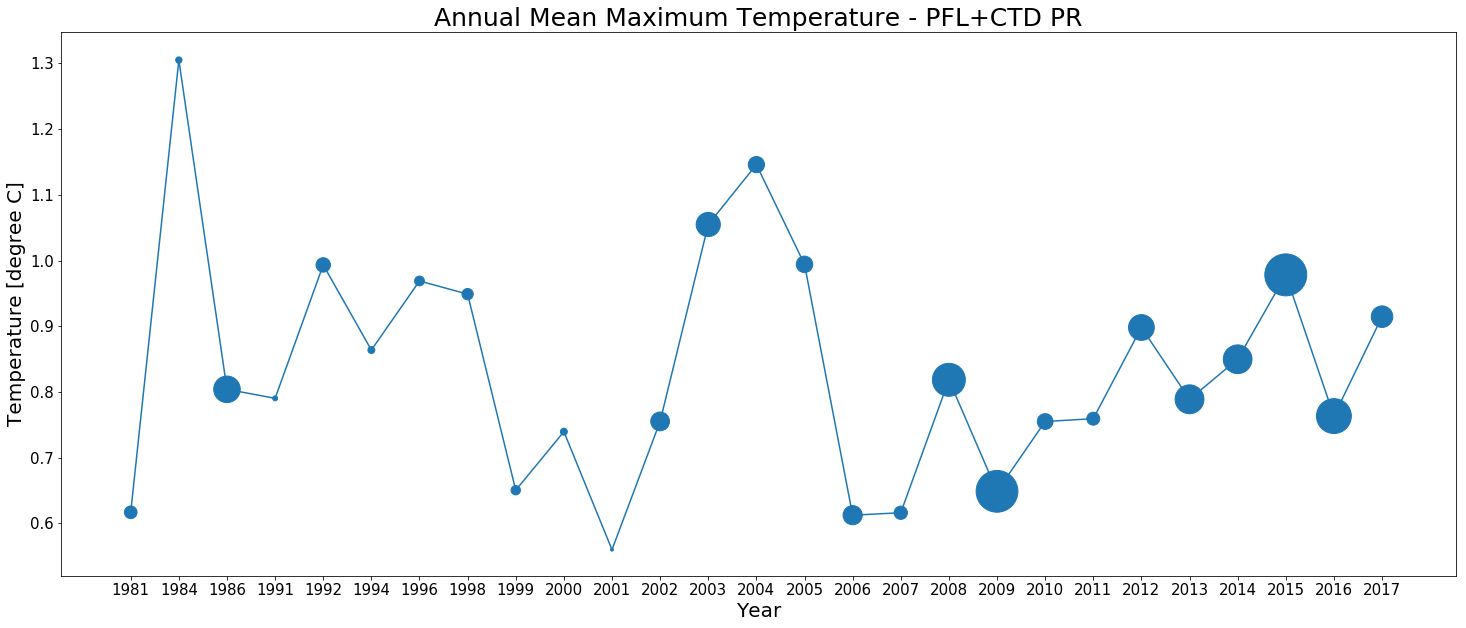

In [9]:
# Bubble Plot Annual Mean Maximum Temperature with Std. Dev. and annual datapoints count
df5 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
df5 = df5.drop([0], axis=0)
print (df5)

x = df5['YearTime']
y = df5['mean'] # Mean dataframe
e = df5['std'] # Standard deviation dataframe

plt.figure(figsize=(25,10))
plt.plot(x, y)
plt.scatter(x, y, s=df5['count']*8) # s displays count on plot
plt.xlabel('Year',  fontsize=20)
plt.ylabel('Temperature [degree C]',  fontsize=20)
plt.title('Annual Mean Maximum Temperature - PFL+CTD PR',  fontsize=25)
#plt.errorbar(x, y, e, linestyle='None', marker='^', elinewidth = 1, barsabove = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()